In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'asol', 'eror']
face_vars     = ['velc', 'hvar', 'asol', 'eror']

ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']

scalar_info     = dict(tmax =  2, dt = 0.001, Re = 1.0)
simulation_info = dict(time_stepping = 'ab2', poisson_solver = 'serial_direct', maxiter = 3000)

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(pres = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(pres = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main()

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
simulation.update_bc_val(gridx, gridy, 'velc', scalars.to)
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

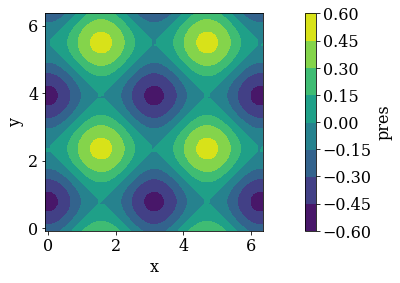

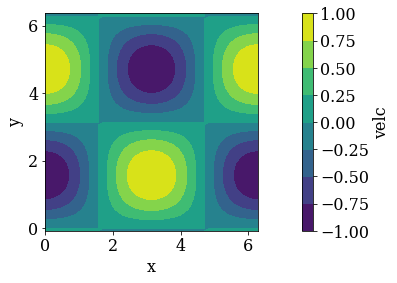

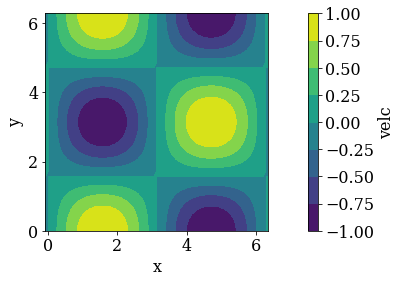

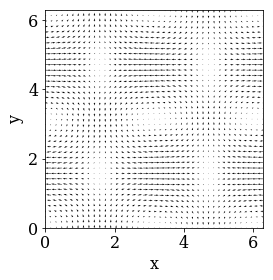

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
while scalars.time <= scalars.tmax:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.time)
    
    ins.advance()
    
    # Display stats
    if scalars.nstep % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.492364276655142e-13
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 2.1487825267076373, -2.293315103737112
Max, Min, DIV : 7.771561172376096e-16, -7.771561172376096e-16


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.93939880970976e-13
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : -0.10957522631374905, -1.054411863311935
Max, Min, DIV : 7.771561172376096e-16, -7.771561172376096e-16


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2225906205118692e-12
Max, Min, U   : 0.9578276459586815, -0.9578276459586814
Max, Min, V   : 0.9578276459586814, -0.9578276459586815
Max, Min, P   :

------------ Time = 0.22000000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.404938928743227e-13
Max, Min, U   : 0.6420510717332313, -0.6420510717332312
Max, Min, V   : 0.6420510717332312, -0.6420510717332313
Max, Min, P   : -0.3528515471625749, -0.7610607540617901
Max, Min, DIV : 6.661338147750939e-16, -6.661338147750939e-16


------------ Time = 0.23000000000000018 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.255232735723709e-13
Max, Min, U   : 0.6293376087080936, -0.6293376087080935
Max, Min, V   : 0.6293376087080935, -0.6293376087080936
Max, Min, P   : -0.5373788040372635, -0.9295913970872602
Max, Min, DIV : 7.077671781985373e-16, -6.661338147750939e-16


------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.270384012634824e-13
Max, Min, U   : 0.6168758891177192, -0.6168758891177192
Max, Min, V   : 0.6168758891177192, -0.6168758891177

------------ Time = 0.46000000000000035 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.138519468493193e-13
Max, Min, U   : 0.3972905398798565, -0.3972905398798565
Max, Min, V   : 0.3972905398798565, -0.3972905398798565
Max, Min, P   : 0.18504111478537316, 0.028682984392258894
Max, Min, DIV : 3.608224830031759e-16, -3.608224830031759e-16


------------ Time = 0.47000000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.738670269220817e-13
Max, Min, U   : 0.3894236601075599, -0.38942366010755985
Max, Min, V   : 0.38942366010755985, -0.3894236601075599
Max, Min, P   : 0.3456005370129679, 0.19537177311798395
Max, Min, DIV : 3.608224830031759e-16, -3.3306690738754696e-16


------------ Time = 0.48000000000000037 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.997254263568193e-13
Max, Min, U   : 0.381712554991691, -0.381712554991691
Max, Min, V   : 0.381712554991691, -0.3817125549916

------------ Time = 0.7000000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.431230880422732e-13
Max, Min, U   : 0.2458367877993504, -0.24583678779935036
Max, Min, V   : 0.24583678779935036, -0.2458367877993504
Max, Min, P   : -0.3289993890810433, -0.38889780423380343
Max, Min, DIV : 1.8041124150158794e-16, -1.942890293094024e-16


------------ Time = 0.7100000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8590950477674544e-14
Max, Min, U   : 0.24096889325091758, -0.24096889325091758
Max, Min, V   : 0.24096889325091758, -0.24096889325091758
Max, Min, P   : 0.03783532045106287, -0.019718370211674902
Max, Min, DIV : 1.942890293094024e-16, -1.942890293094024e-16


------------ Time = 0.7200000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.097371905112059e-14
Max, Min, U   : 0.23619738947274657, -0.23619738947274654
Max, Min, V   : 0.23619738947274654, -0.23

------------ Time = 0.9300000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.938352422958232e-14
Max, Min, U   : 0.15520831724335013, -0.15520831724335013
Max, Min, V   : 0.15520831724335013, -0.15520831724335013
Max, Min, P   : 0.05007414923993122, 0.026160240619404366
Max, Min, DIV : 1.5265566588595902e-16, -1.6653345369377348e-16


------------ Time = 0.9400000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1087654943058393e-13
Max, Min, U   : 0.1521390145527251, -0.1521390145527251
Max, Min, V   : 0.15213901455272513, -0.1521390145527251
Max, Min, P   : -0.09922853284660776, -0.1222068597510458
Max, Min, DIV : 1.5265566588595902e-16, -1.5959455978986625e-16


------------ Time = 0.9500000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2305477900345478e-13
Max, Min, U   : 0.14913042616501945, -0.14913042616501945
Max, Min, V   : 0.14913042616501948, -0.

------------ Time = 1.169999999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7308956263146912e-14
Max, Min, U   : 0.09610499139592431, -0.09610499139592428
Max, Min, V   : 0.0961049913959243, -0.09610499139592428
Max, Min, P   : 0.03146103941388102, 0.02228137695777657
Max, Min, DIV : 9.020562075079397e-17, -9.020562075079397e-17


------------ Time = 1.1799999999999808 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.771257142428591e-14
Max, Min, U   : 0.09420480866254562, -0.09420480866254559
Max, Min, V   : 0.0942048086625456, -0.0942048086625456
Max, Min, P   : 0.04242242314973484, 0.03360162359107449
Max, Min, DIV : 8.326672684688674e-17, -9.020562075079397e-17


------------ Time = 1.1899999999999797 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.380143072592257e-14
Max, Min, U   : 0.09234221216974373, -0.09234221216974371
Max, Min, V   : 0.09234221216974371, -0.09234221

------------ Time = 1.4099999999999555 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.082620426783835e-14
Max, Min, U   : 0.05951403315975964, -0.05951403315975964
Max, Min, V   : 0.05951403315975963, -0.05951403315975964
Max, Min, P   : -0.01881057358052306, -0.022337178208255207
Max, Min, DIV : 4.5102810375396984e-17, -5.551115123125783e-17


------------ Time = 1.4199999999999544 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.977254422584596e-14
Max, Min, U   : 0.058337597302276674, -0.058337597302276674
Max, Min, V   : 0.05833759730227667, -0.058337597302276674
Max, Min, P   : -0.05965836846471673, -0.0630472314537888
Max, Min, DIV : 5.551115123125783e-17, -4.85722573273506e-17


------------ Time = 1.4299999999999533 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0108163769365666e-14
Max, Min, U   : 0.05718442895767901, -0.05718442895767901
Max, Min, V   : 0.057184428957679, -0

------------ Time = 1.649999999999929 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5890554834665975e-14
Max, Min, U   : 0.03685928565178667, -0.03685928565178667
Max, Min, V   : 0.03685928565178667, -0.03685928565178667
Max, Min, P   : 0.016615079179149755, 0.015259020480363318
Max, Min, DIV : 3.642919299551295e-17, -3.859759734048396e-17


------------ Time = 1.659999999999928 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.184914505176744e-14
Max, Min, U   : 0.03613088252179312, -0.036130882521793126
Max, Min, V   : 0.036130882521793126, -0.036130882521793126
Max, Min, P   : -0.031086002862768698, -0.0323891444216215
Max, Min, DIV : 4.163336342344337e-17, -4.163336342344337e-17


------------ Time = 1.6699999999999269 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1363438581524377e-14
Max, Min, U   : 0.03541688324368901, -0.03541688324368902
Max, Min, V   : 0.03541688324368901, -

------------ Time = 1.8899999999999026 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6439736174925654e-15
Max, Min, U   : 0.022831795557774655, -0.022831795557774655
Max, Min, V   : 0.02283179555777465, -0.022831795557774655
Max, Min, P   : 0.0039029445146784585, 0.0033811356828964507
Max, Min, DIV : 2.2551405187698492e-17, -2.2551405187698492e-17


------------ Time = 1.8999999999999015 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7450432717232716e-14
Max, Min, U   : 0.02238075427897788, -0.02238075427897788
Max, Min, V   : 0.02238075427897788, -0.02238075427897788
Max, Min, P   : -0.017107229310082243, -0.017608684587851024
Max, Min, DIV : 2.6020852139652106e-17, -2.2551405187698492e-17


------------ Time = 1.9099999999999004 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.192964648409307e-14
Max, Min, U   : 0.02193863019428085, -0.02193863019428085
Max, Min, V   : 0.0219386301

In [7]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.time)

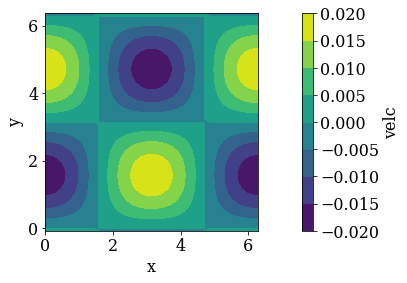

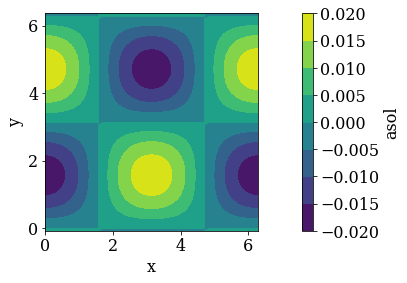

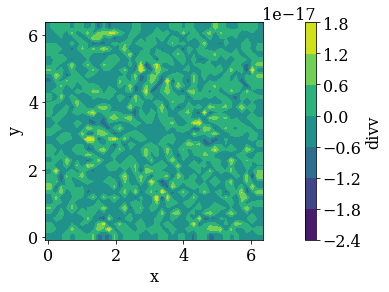

In [8]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [9]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

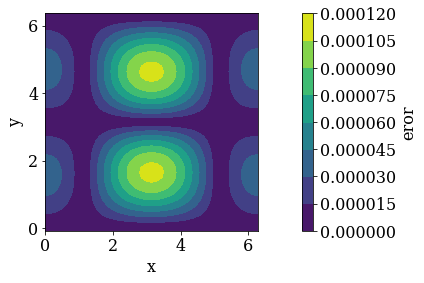

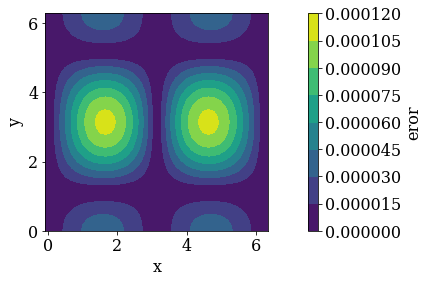

In [10]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')